In [1]:
%pylab inline
import corner as corner
import seaborn as sns
import matplotlib.patches as mpatches

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.family'] ='serif'

Generating the prior corner plot
14985
[3.23256431e+02 4.96100329e-04 2.39023185e-01 6.28346710e+14
 1.36240404e+35 2.25143368e+00 1.44733615e+01 0.00000000e+00]
14979


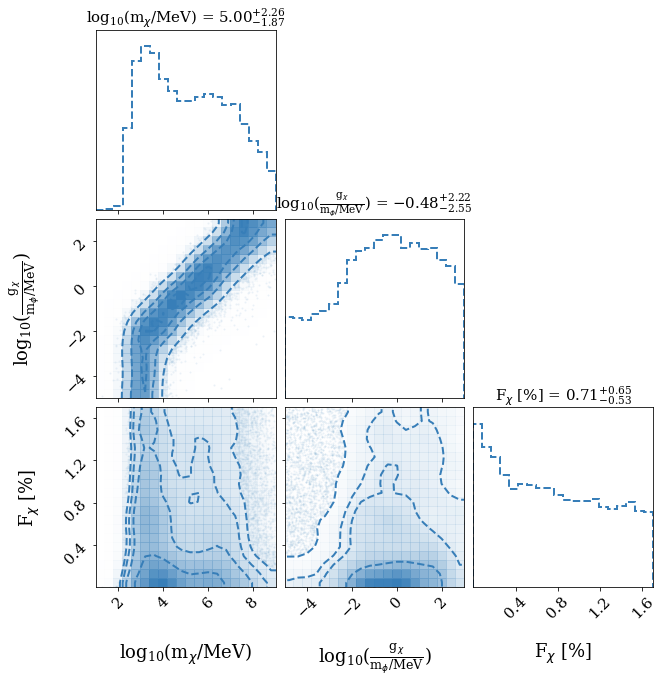

In [3]:
scattered = numpy.loadtxt('FERMIONIC_REAL_DATA_PRIOR_scattered.txt')
print('Generating the prior corner plot')

tmp = []

print(len(scattered))
print(scattered[0])
#This loops is to cut out all of the halos, where 
#the last element in each array scattered[i] is a flag telling 
#which configurations are halos and which are cores.
#and scattered[i][5] >=1.
for i in range(len(scattered)):
    if scattered[i][-1]==0 and scattered[i][5]>=1.:
        tmp.append(scattered[i])
    #if scattered_07[i][-1]==0 and scattered_07[i][5] >= 0.9:
        #tmp.append(scattered_07[i])


        

tmp = numpy.array(tmp)
print(len(tmp))
Matrix_prior = numpy.zeros((len(tmp),3))

#m_chi = tmp[:,0]
#g_chi = tmp[:,1]
#F_chi = tmp[:,2]

for i in range(len(tmp)):
    Matrix_prior[i] =numpy.log10(tmp[:,0][i]),numpy.log10(tmp[:,1][i]),tmp[:,2][i]

    


figure = corner.corner(Matrix_prior,smooth = 1.0,labels = [r"log$_{10}$(m$_\chi$/MeV)",r"log$_{10}$($\frac{\mathdefault{g}_\chi}{\mathdefault{m}_\phi/\mathdefault{MeV}})$",r"F$_\chi$ [%]",],
                      range = [(1,9),(-5,3),(0,1.7)], show_titles = True,label_kwargs = {"fontsize":18,"font":'serif'},title_kwargs = {"fontsize":15},
                      color = '#377eb8',hist_kwargs = {'linestyle': '--','linewidth': 2.0}, contour_kwargs = {'linestyles':'dashed','linewidths': 2.0} )



figure.subplots_adjust(right=1.15,top=1.15)

for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=15)
    
#figure.savefig('PRIOR_FERMIONIC_REAL_Corner_min_mass_constraint.pdf',bbox_inches='tight')
#figure.savefig('PRIOR_FERMIONIC_REAL_Corner_min_mass_constraint.png',bbox_inches='tight')
#figure.savefig(run_name + 'Corner.pdf',dpi = 300,bbox_inches='tight')

Generating the posterior corner plot
15475


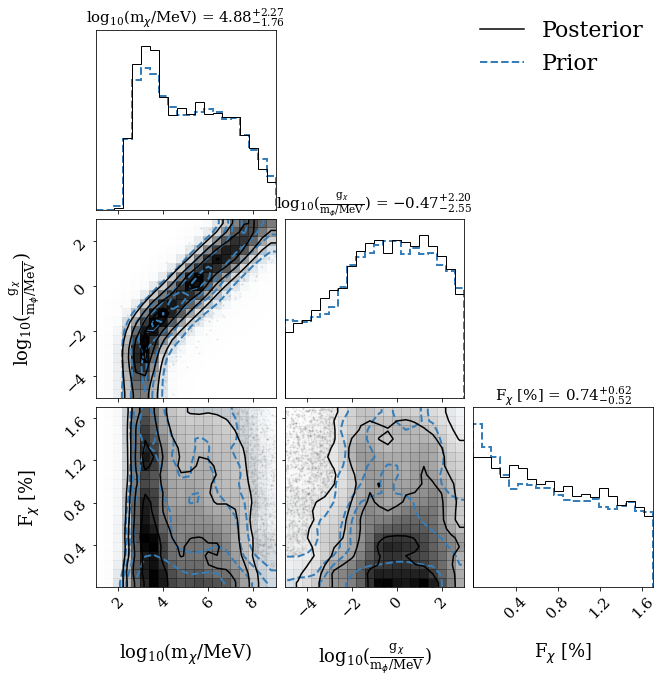

In [4]:
print('Generating the posterior corner plot')


# In[4]:


ewposterior = numpy.loadtxt('NICER_REAL_ADM_VARYING_BARYONIC_3k_post_equal_weights.dat')
print(len(ewposterior))


# In[5]:




mchi = ewposterior[:,5]
gchi_over_mphi = ewposterior[:,6]
Fchi = ewposterior[:,7]
epscent_0740 = ewposterior[:,9]
epscent_0030 = ewposterior[:,10]

Matrix = numpy.zeros((len(epscent_0740),3))
###### Everything below this needs to be fixed!####
for i in range(len(epscent_0740)):
    Matrix[i] =numpy.log10(mchi[i]),numpy.log10(gchi_over_mphi[i]),Fchi[i]




#mchi_prior = numpy.log10(scattered_prior[:,0])
#gchi_over_mphi_prior= numpy.log10(scattered_prior[:,1])
#Fchi_prior= scattered_prior[:,2]

#Matrix_prior = numpy.zeros((len(scattered_prior),3)) 

#for i in range(len(scattered_prior)):
    #Matrix_prior[i] = mchi_prior[i], gchi_over_mphi_prior[i], Fchi_prior[i]       
    
ell = corner.corner(Matrix_prior,smooth = 1.0,color = '#377eb8',group = 'prior',range = [(1,9),(-5,3),(0,1.7)],
                   plot_datapoints = False,plot_density = True,plot_contours = True,divergences = False,
                    hist_kwargs = {'linestyle': '--','linewidth': 2.0}, contour_kwargs = {'linestyles':'dashed','linewidths': 2.0})

#Matrix,smooth = 1.0,fig = ell,
figure = corner.corner(Matrix,smooth = 1.0,fig = ell,labels = [r"log$_{10}$(m$_\chi$/MeV)",r"log$_{10}$($\frac{\mathdefault{g}_\chi}{\mathdefault{m}_\phi/\mathdefault{MeV}})$",r"F$_\chi$ [%]"],
                      range = [(1,9),(-5,3),(0,1.7)], show_titles = True,label_kwargs = {"fontsize":18,"font":'serif'},title_kwargs = {"fontsize":15})
figure.subplots_adjust(right=1.15,top=1.15)

#quantiles =(0.001,0.999)
figure.subplots_adjust(right=1.15,top=1.15)
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=15) 
    
figure.legend(handles =[matplotlib.lines.Line2D([],[],color = 'black',label = 'Posterior'),
                        matplotlib.lines.Line2D([],[],color = '#377eb8',label = 'Prior',linestyle = '--',lw = 2.0)],
                  fontsize = 22,frameon = False,loc = "upper right")


#matplotlib.lines.Line2D([],[],color = 'C1',label = 'Ground Truth',linestyle = '-')

figure.savefig('POSTERIOR_FERMIONIC_REAL_Corner_min_mass_constraint.png',bbox_inches='tight')
#figure.savefig('POSTERIOR_FERMIONIC_REAL_07nsaturation_Corner_min_mass_constraint.png',dpi = 300,bbox_inches='tight')
#figure.savefig('FERMIONIC_LITERATURE_REAL_DATA_Corner_min_mass_constraint.jpeg',bbox_inches='tight')
#figure.savefig('POSTERIOR_FERMIONIC_REAL_07nsaturation_Corner_min_mass_constraint.pdf',bbox_inches='tight')

print('Generating the posterior corner plot')


# In[4]:


ewposterior = numpy.loadtxt('POSTERIOR_FERMIONIC_REAL_07nsaturation_post_equal_weights.dat')
print(ewposterior[0])


# In[5]:




mchi = ewposterior[:,5]
gchi_over_mphi = ewposterior[:,6]
Fchi = ewposterior[:,7]
epscent_0740 = ewposterior[:,9]
epscent_0030 = ewposterior[:,10]

Matrix = numpy.zeros((len(epscent_0740),3))
###### Everything below this needs to be fixed!####
for i in range(len(epscent_0740)):
    Matrix[i] =numpy.log10(mchi[i]),numpy.log10(gchi_over_mphi[i]),Fchi[i]




#mchi_prior = numpy.log10(scattered_prior[:,0])
#gchi_over_mphi_prior= numpy.log10(scattered_prior[:,1])
#Fchi_prior= scattered_prior[:,2]

#Matrix_prior = numpy.zeros((len(scattered_prior),3)) 

#for i in range(len(scattered_prior)):
    #Matrix_prior[i] = mchi_prior[i], gchi_over_mphi_prior[i], Fchi_prior[i]       
    
ell = corner.corner(Matrix_prior,smooth = 1.0,color = '#377eb8',group = 'prior',range = [(1,9),(-5,3),(0,1.7)],
                   plot_datapoints = False,plot_density = True,plot_contours = True,divergences = False,
                    hist_kwargs = {'linestyle': '--'})

figure = corner.corner(Matrix,smooth = 1.0,fig = ell,labels = [r"$log_{10}(m_\chi/MeV)$",r"$log_{10}(\frac{g_\chi}{m_\phi/MeV})$",r"$F_\chi$"]
                       ,color = 'black',range = [(1,9),(-5,3),(0,1.7)],
                       show_titles = True,label_kwargs = {"fontsize":20},title_kwargs = {"fontsize":15},
                       hist_kwargs = {'linewidth':1.0})

#quantiles =(0.001,0.999)
figure.subplots_adjust(right=1.15,top=1.15)
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=15) 
    
figure.legend(handles =[matplotlib.lines.Line2D([],[],color = 'black',label = 'Posterior'),
                        matplotlib.lines.Line2D([],[],color = '#377eb8',label = 'Prior',linestyle = '--')],
                  fontsize = 20,frameon = False,loc = "upper right")


#matplotlib.lines.Line2D([],[],color = 'C1',label = 'Ground Truth',linestyle = '-')

#figure.savefig('POSTERIOR_FERMIONIC_REAL_07nsaturation_Corner_min_mass_constraint.png',dpi = 300,bbox_inches='tight')
#figure.savefig('POSTERIOR_FERMIONIC_REAL_07_Corner_min_mass_constraint.jpeg',bbox_inches='tight')
#figure.savefig('POSTERIOR_FERMIONIC_REAL_07nsaturation_Corner_min_mass_constraint.pdf',bbox_inches='tight')

In [5]:
mchi_prior = tmp[:,0]
gchi_over_mphi_prior = tmp[:,1]
Fchi_prior = tmp[:,2]

In [6]:
matrix = np.zeros((len(mchi),2))
for i in range(len(matrix)):
    matrix[i] = numpy.log10(gchi_over_mphi[i]/mchi[i]),Fchi[i]
    
matrixp = np.zeros((len(mchi_prior),2))
for i in range(len(matrixp)):
    matrixp[i] = numpy.log10(gchi_over_mphi_prior[i]/mchi_prior[i]),Fchi_prior[i]

In [7]:
def get_quantiles(array, quantiles=[0.05, 0.5, 0.95]): #0.05,0.5,0.95 0.16,0.5,0.84
        contours = np.nanquantile(array, quantiles) #changed to nanquantile to inorder to ignore the nans that may appear
        low = contours[0]
        median = contours[1]
        high = contours[2]
        minus = low - median
        plus = high - median
        return np.round(median,2),np.round(plus,2),np.round(minus,2) 

In [8]:
def get_quantiles2(array, quantiles=[0.05, 0.5, 0.95]): #0.05,0.5,0.95 0.16,0.5,0.84
        contours = np.nanquantile(array, quantiles) #changed to nanquantile to inorder to ignore the nans that may appear
        low = contours[0]
        median = contours[1]
        high = contours[2]
        minus = low - median
        plus = high - median
        return np.round(low,2),np.round(median,2),np.round(high,2) 

In [9]:
print('Posteriors 68% ', get_quantiles(matrix[:,0], quantiles = [0.16,0.5,0.84]) )
print('Posteriors 95% ', get_quantiles(matrix[:,0]) )

Posteriors 68%  (-5.62, 0.97, -0.97)
Posteriors 95%  (-5.62, 1.36, -1.75)


In [10]:
print('Posteriors 68% ', get_quantiles2(matrix[:,0], quantiles = [0.16,0.5,0.84]) )
print('Posteriors 95% ', get_quantiles2(matrix[:,0]) )

Posteriors 68%  (-6.59, -5.62, -4.65)
Posteriors 95%  (-7.36, -5.62, -4.26)


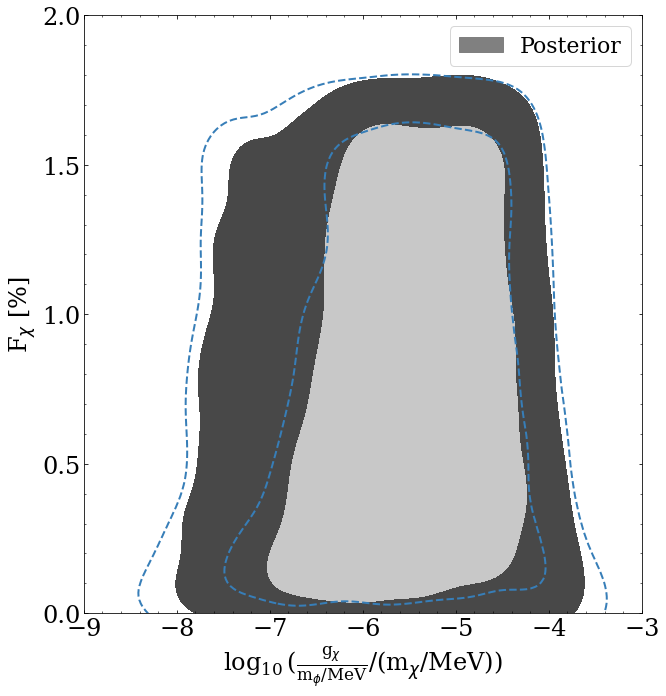

In [7]:
fig,ax = plt.subplots(figsize = (10,11))
#fig = plt.figure(figsize=(24, 12))
#subfig1, subfig2 = fig.subfigures(ncols=2,wspace = 1.)


#subfig2,ax = plt.subplots(figsize=(12, 12))
plot = sns.kdeplot(data = matrix,x = matrix[:,0],y = matrix[:,1],fill = True,cbar = False,cmap = 'gray'
                   ,common_norm = True,levels=[0.05,0.32,1.],ax = ax)

#plot = sns.kdeplot(data = matrix,x = matrix[:,0],y = matrix[:,1],fill = True,cbar = True,cmap = 'gray',
#            cbar_kws = {'label': 'PDF'},common_norm = True,levels=[0.05,0.32,1.],ax = ax)

plot_prior = sns.kdeplot(data = matrixp,x = matrixp[:,0],y = matrixp[:,1],shade = False,cbar = False,
                   colors = '#377eb8',common_norm = True,levels =[0.05,0.32,1],label = "Prior", linestyles = 'dashed',
                        linewidths = 2.,ax = ax)
plot.figure.axes[-1].yaxis.label.set_size(24)
plot.figure.axes[-1].xaxis.label.set_size(24)
plot.figure.axes[-1].tick_params(labelsize=24)
ax.set_ylabel(r"F$_\chi$ [%]",font = 'serif',size = 24)
ax.set_xlabel(r"$\log_{10}(\frac{\mathdefault{g}_\chi}{\mathdefault{m}_\phi/\mathdefault{MeV}}/(\mathdefault{m}_\chi/\mathdefault{MeV}))$",font = 'serif',size =24)
ax.tick_params(axis='both', which='major', labelsize=24)

#ax.set_title(r'Varying Baryonic & ADM',fontsize = 20)
ax.legend(handles =[mpatches.Patch(color = 'Grey',label = 'Posterior')],
                 fontsize = 22,frameon = True,loc = "upper right")
#matplotlib.lines.Line2D([],[],color = '#377eb8',label = 'Prior',linestyle = 'dashed',lw = 3)
#[mpatches.Patch(facecolor=plt.cm.Reds(100), label="Workday"),
           #mpatches.Patch(facecolor=plt.cm.Blues(100), label="Non-workday")


ax.set_yticks([0,0.5,1.,1.5,2.])
ax.set_xticks([-9,-8,-7,-6,-5,-4,-3])
ax.set_ylim(0.0,2.)
ax.set_xlim(-9,-3)
ax.minorticks_on()
ax.tick_params(top=1,right=1, which='both',axis = 'both', direction='in', labelsize=24)


#fig.savefig('POSTERIOR_FERMIONIC_REAL_ratio_plot.png',bbox_inches='tight')

In [8]:
fig.savefig('POSTERIOR_FERMIONIC_REAL_ratio_plot.png',bbox_inches='tight')